In [1]:
import os
CURDIR = os.getcwd().split("\\")
if "notebooks" in CURDIR:
    n = len(CURDIR) - CURDIR.index("notebooks")
    os.chdir(os.getcwd() + ("\\.." * n))

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

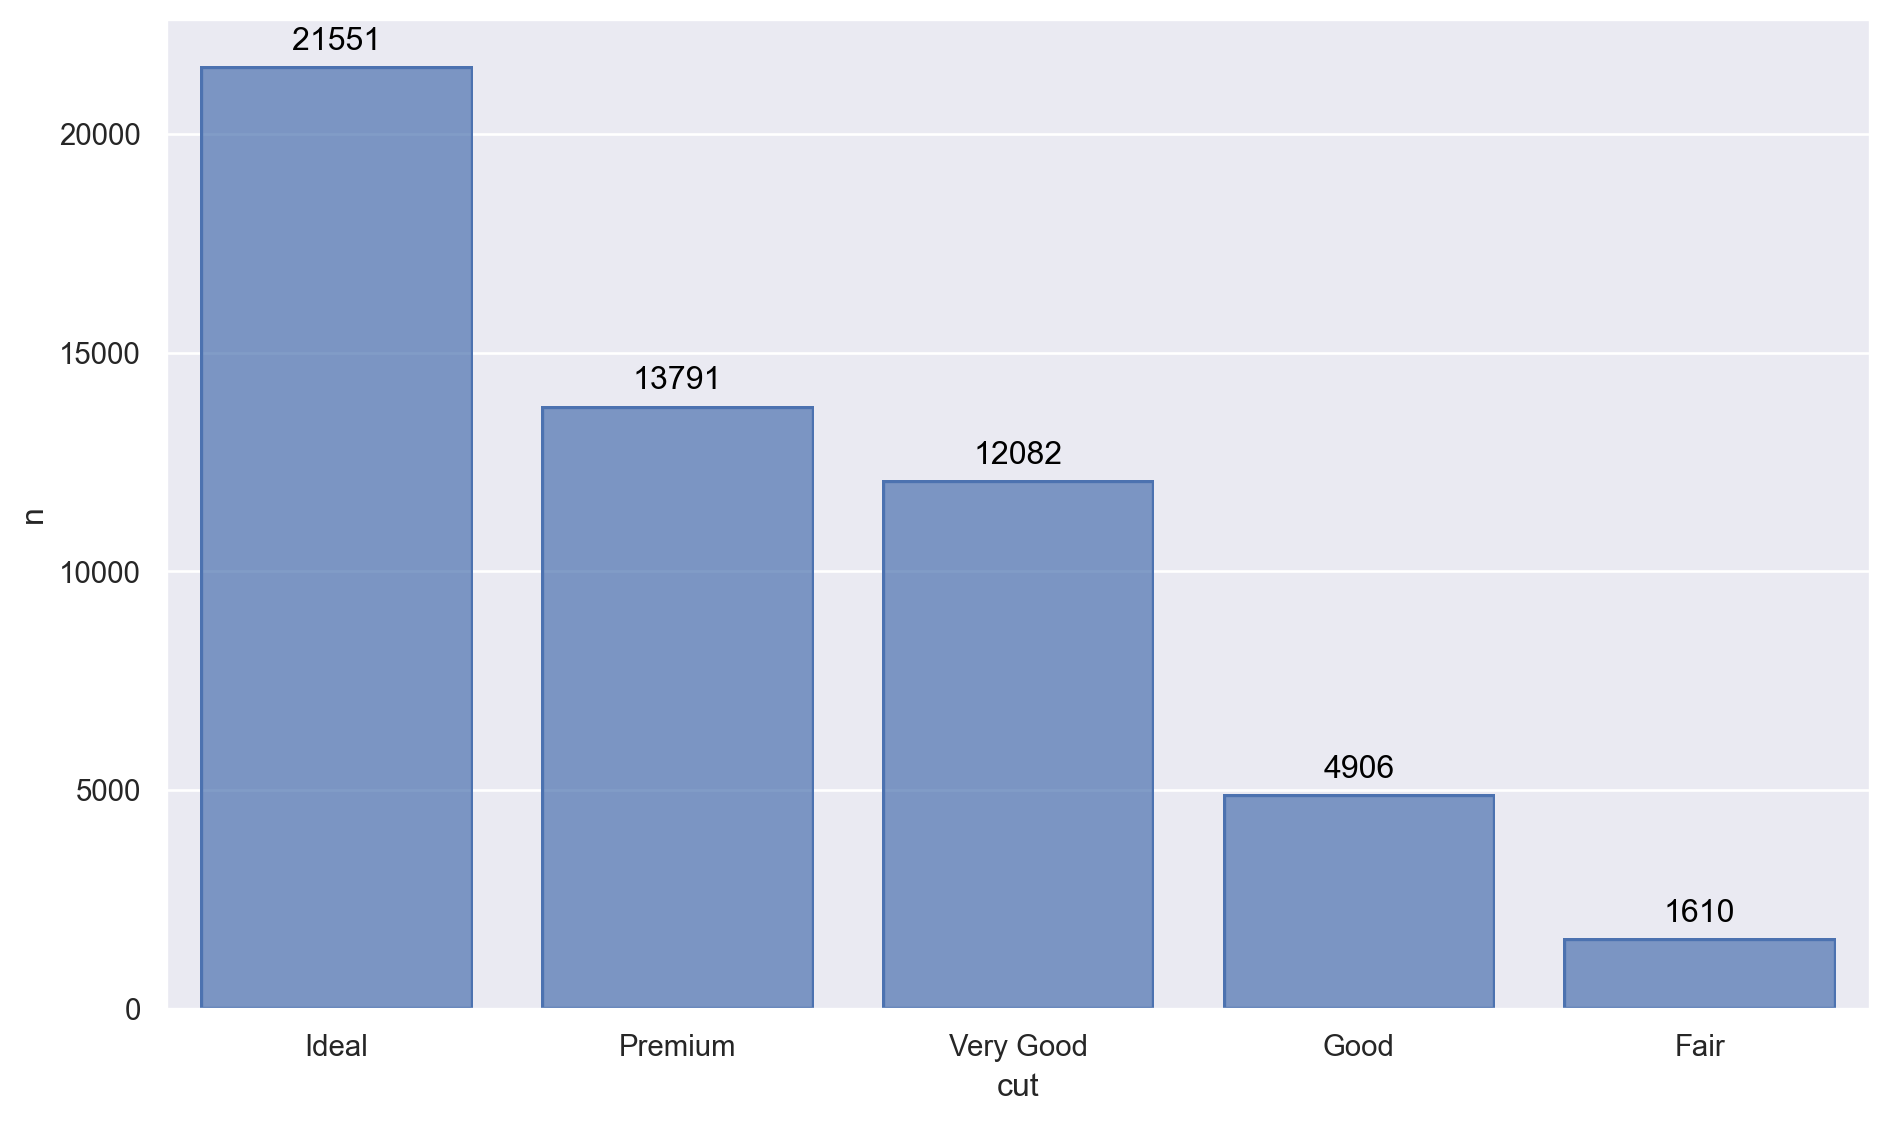

In [3]:
from visualize.barplot import BarPlot
tab = diamonds.groupby("cut")["cut"].count().to_frame().rename(columns={"cut":"n"}).reset_index()
BarPlot(tab, x="cut",y="n").plot()

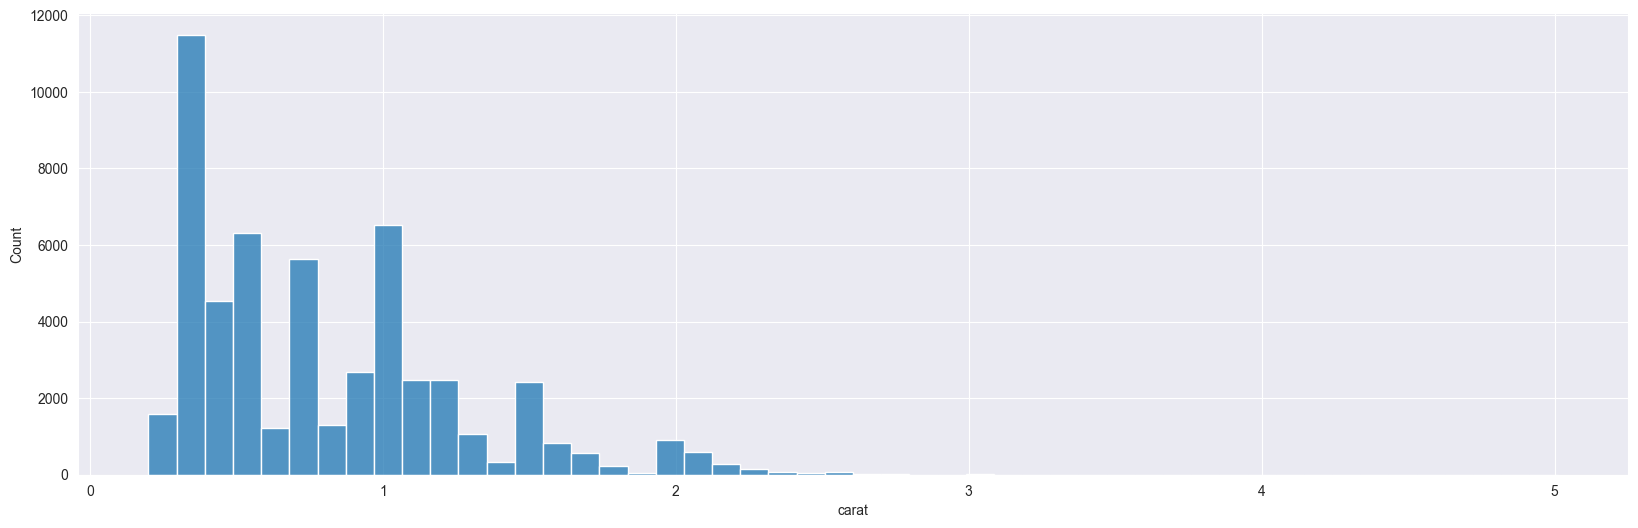

In [7]:
from visualize.hist import HistPlot
h = HistPlot(df=diamonds,x="carat", bins = 50)
h.plot(width=20)

In [17]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

In [18]:
diamonds.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [44]:
from pandas.api.types import CategoricalDtype
import numpy as np
import pandas as pd
def fct_ordered(series:pd.Series, ordered_levels:list):
    """
    Create ordered factor from string or normal cat series
    Example: diamonds.cut = fct_ordered(diamonds.cut,ordered_levels=["Fair","Good","Very Good","Premium","Ideal"])
    """
    cat_type = CategoricalDtype(ordered_levels, ordered = True)
    return series.astype(cat_type)


def fct_levels(series:pd.Series):
    """
    Return categories of a series 
    """
    return list(series.astype('category').cat.categories)

def expand_grid(*args):
    """
    Based on an arbirtary number of lists or numpy arrays 
    returns a numpy grid of all possible combinations of the elements of these lists or arrays
    """
    liste = [len(arg) for arg in args]
    n_comb = reduce(lambda x, y: x * y,liste)
    X = np.array(
        np.meshgrid(*args)
    ).reshape(len(args),n_comb).T
    return X

In [46]:
fct_levels(diamonds.cut)

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [43]:
pd.Series(["str","rtg"]).astype('category').cat.categories

Index(['rtg', 'str'], dtype='object')

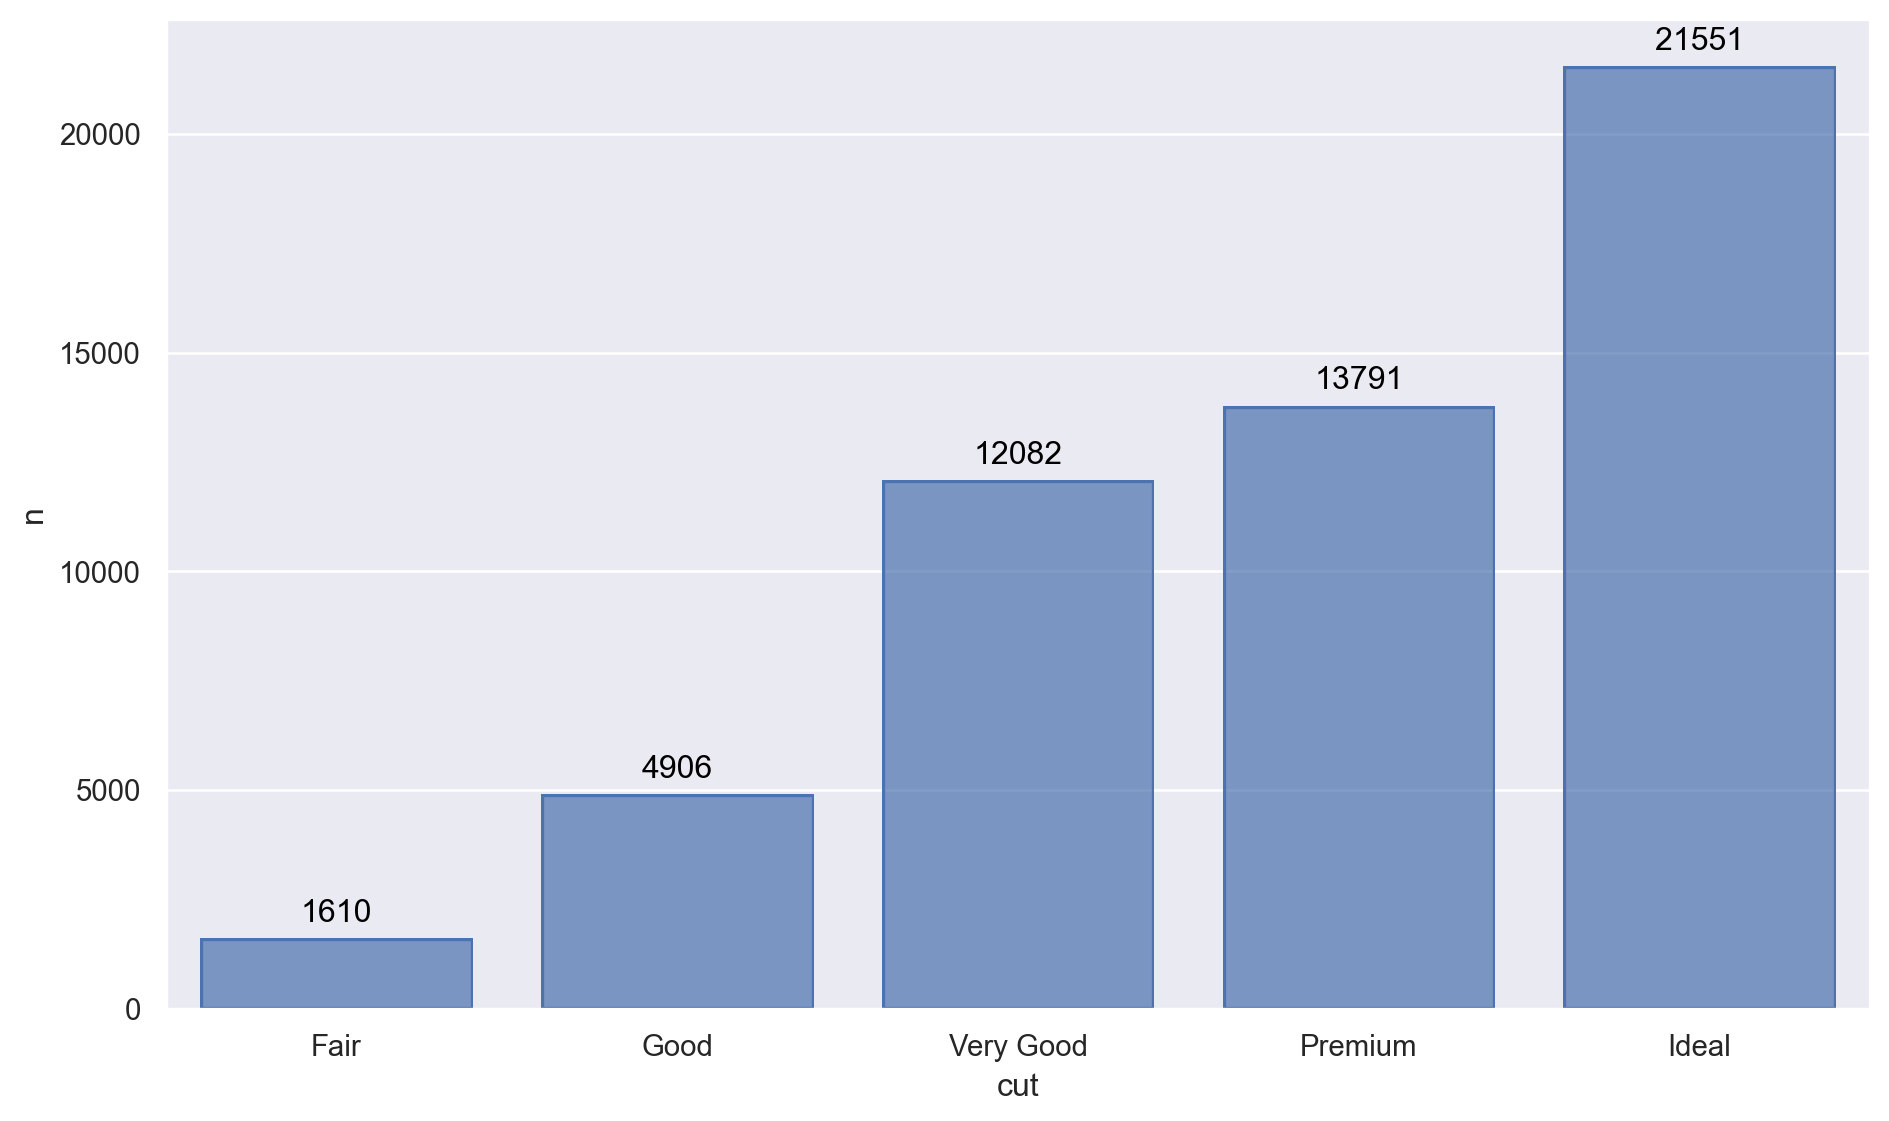

In [20]:
tab = diamonds.groupby("cut")["cut"].count().to_frame().rename(columns={"cut":"n"}).reset_index()
from visualize.barplot import BarPlot
BarPlot(tab, x="cut",y="n").plot()